In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')

In [3]:
train_df['id_code']=train_df['id_code']+'.png'

In [4]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [5]:
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [6]:
train_df['diagnosis'].value_counts().sum()

3662

Text(0.5, 1.0, 'Unevenness in the dataset')

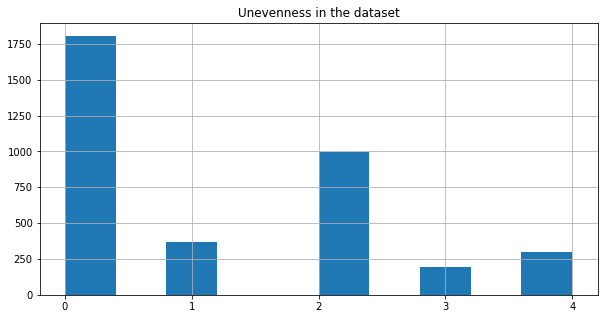

In [7]:
mpl.rcParams['figure.figsize'] = (10, 5)
plot_hist=train_df['diagnosis'].hist()
x_ticks=plt.xticks(range(5))
plt.title("Unevenness in the dataset")

In [8]:
from sklearn.model_selection import train_test_split
train_only_df, validation_only_df = train_test_split(train_df, test_size=0.05)

In [9]:
train_only_df['diagnosis'].value_counts()

0    1718
2     954
1     345
4     280
3     181
Name: diagnosis, dtype: int64

In [10]:
majority_length=train_only_df['diagnosis'].value_counts()[0]

In [11]:
traindf_d0=train_only_df[train_only_df['diagnosis']==0]
traindf_d1=train_only_df[train_only_df['diagnosis']==1]
traindf_d2=train_only_df[train_only_df['diagnosis']==2]
traindf_d3=train_only_df[train_only_df['diagnosis']==3]
traindf_d4=train_only_df[train_only_df['diagnosis']==4]

In [12]:
from sklearn.utils import resample

In [13]:
traindf_d1_resampled=resample(traindf_d1,replace=True,n_samples=majority_length,random_state=123)
traindf_d2_resampled=resample(traindf_d2,replace=True,n_samples=majority_length,random_state=123)
traindf_d3_resampled=resample(traindf_d3,replace=True,n_samples=majority_length,random_state=123)
traindf_d4_resampled=resample(traindf_d4,replace=True,n_samples=majority_length,random_state=123)

In [14]:
train_df_upsampled=pd.concat([traindf_d0,traindf_d1_resampled,traindf_d2_resampled,traindf_d3_resampled,traindf_d4_resampled])

In [15]:
train_df_upsampled=train_df_upsampled.sample(frac=1)#shuffling

In [16]:
train_df_upsampled.head()

,id_code,diagnosis
3487,f2d2a0c92034.png,4
3358,e933923aab15.png,0
1754,7bda86d95c5b.png,2
2647,b7983cb3f270.png,0
2393,a77dbec966d4.png,1


In [17]:
train_df_upsampled['diagnosis'].value_counts()

4    1718
3    1718
2    1718
1    1718
0    1718
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Balanced dataset')

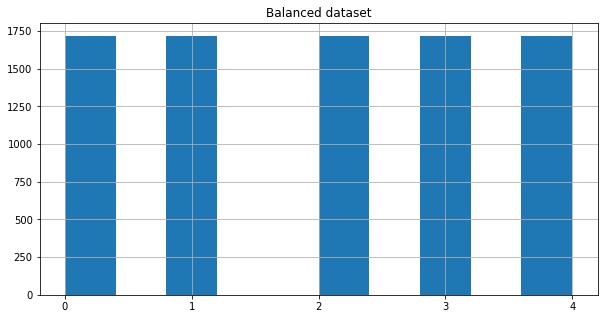

In [18]:
mpl.rcParams['figure.figsize'] = (10, 5)
plot_hist=train_df_upsampled['diagnosis'].hist()
x_ticks=plt.xticks(range(5))
plt.title("Balanced dataset")

In [19]:
validation_only_df['diagnosis'].value_counts()

0    87
2    45
1    25
4    15
3    12
Name: diagnosis, dtype: int64

In [20]:
train_df_upsampled.to_csv('train.csv',index=False)
validation_only_df.to_csv('validation.csv',index=False)